In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

# Cargar el dataset
df = sns.load_dataset('penguins')

In [2]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [4]:
df['species'].unique()
# hay 3 especies de pingüinos

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Las características son específicamente las siguientes: longitud del pico en mm, profundidad del pico en mm, longitud de la aleta en mm, masa corporal en g.
A continuación se puede ver la descripción cuantitativas asociadas a las especies.

In [5]:
df.groupby('species').describe()

bill_length_mm                                                   \
                   count       mean       std   min    25%    50%     75%   
species                                                                     
Adelie             151.0  38.791391  2.663405  32.1  36.75  38.80  40.750   
Chinstrap           68.0  48.833824  3.339256  40.9  46.35  49.55  51.075   
Gentoo             123.0  47.504878  3.081857  40.9  45.30  47.30  49.550   

                bill_depth_mm             ... flipper_length_mm         \
            max         count       mean  ...               75%    max   
species                                   ...                            
Adelie     46.0         151.0  18.346358  ...             195.0  210.0   
Chinstrap  58.0          68.0  18.420588  ...             201.0  212.0   
Gentoo     59.6         123.0  14.982114  ...             221.0  231.0   

          body_mass_g                                                   \
                count         mean         std     min     25%     50%   
species                                                                  
Adelie          151.0  3700.662252  458.566126  2850.0  3350.0  3700.0   
Chinstrap        68.0  3733.088235  384.335081  2700.0  3487.5  3700.0   
Gentoo          123.0  5076.016260  504.116237  3950.0  4700.0  5000.0   

                           
              75%     max  
species                    
Adelie     4000.0  4775.0  
Chinstrap  3950.0  4800.0  
Gentoo     5500.0  6300.0  

[3 rows x 32 columns]

Con lo siguiente tenemos información sobre las variables faltantes.

In [6]:
#tamaño del dataframe
df.shape

(344, 7)

2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

In [7]:
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


La estrategia de limpieza es: Como son pocos los datos faltantes, en este caso menores al 4%. Se pueden eliminar estos con la siguiente función:

In [8]:
df_clean = df.dropna()
print(df_clean.shape)

(333, 7)


3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

In [9]:
print(df['island'].value_counts())

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


La isla con mayor número de pingüinos es Biscoe.

Intuitivamente se puede ver un desbalance notable en el número de pingüinos, pero es más adecuado elegir paramétros cuantitativos que midan objetivamente este desbalance; una puede ser los porcentajes, o también se puede usar el coeficiente de variación, que mide la dispersión de los datos. Definido como CV=μ/σ​.

In [10]:
df['island'].value_counts(normalize=True) * 100

,proportion
island,
Biscoe,48.837209
Dream,36.046512
Torgersen,15.116279


In [11]:
conteos = df['island'].value_counts()
cv = conteos.std() / conteos.mean()
print(f"Coeficiente de variación: {cv:.2f}")

Coeficiente de variación: 0.51


Este número de 0.51 refleja un alto grado de desbalance en el número de pingüinos por isla.

Ahora observando las especies

In [12]:
df[['island', 'species']].value_counts()

island     species  
Biscoe     Gentoo       124
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Biscoe     Adelie        44
Name: count, dtype: int64

In [13]:
df[['island', 'species' ]].value_counts(normalize=True) * 100

island     species  
Biscoe     Gentoo       36.046512
Dream      Chinstrap    19.767442
           Adelie       16.279070
Torgersen  Adelie       15.116279
Biscoe     Adelie       12.790698
Name: proportion, dtype: float64

In [14]:
conteos = df[['island', 'species' ]].value_counts()
cv = conteos.std() / conteos.mean()
print(f"Coeficiente de variación: {cv:.2f}")

Coeficiente de variación: 0.47


Igual que antes, el parámetro que cuantifica el desbalance observando la cantidad de especies en las diferentes islas es bastante alto

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [15]:
df.groupby('species')['bill_length_mm'].agg(['mean', 'std'])

,mean,std
species,,
Adelie,38.791391,2.663405
Chinstrap,48.833824,3.339256
Gentoo,47.504878,3.081857


6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [16]:
mayor_pico = df['bill_length_mm'].max()
print(mayor_pico)
fila= df[df['bill_length_mm'] == mayor_pico]
print(fila['species'].values[0])

59.6
Gentoo


7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

Para esto lo primero que se me ocurre es ver una descripción cuantitativa de la grasa corporal.

In [17]:
df.groupby('species')['body_mass_g'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.66,458.57,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.09,384.34,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.02,504.12,3950.0,4700.0,5000.0,5500.0,6300.0


8. Describa la distribucion con ayuda de la media, desviacion estandard

In [18]:
md= df.groupby('species')['body_mass_g'].agg(['mean', 'std']).round(2)
print(md)

              mean     std
species                   
Adelie     3700.66  458.57
Chinstrap  3733.09  384.34
Gentoo     5076.02  504.12


Luego podemos correr a través de los datos, para hacer conclusiones descriptivas.

In [19]:
for especie, fila in md.iterrows():
    media = fila['mean']
    std = fila['std']
    minimo = media - std
    maximo = media + std

    print(f"La especie {especie} tiene una masa corporal media de {media} g, "
          f"con una desviación estándar de {std} g. "
          f"Aproximadamente el 68% de los individuos se encuentran entre {minimo:.2f} g y {maximo:.2f} g.")

La especie Adelie tiene una masa corporal media de 3700.66 g, con una desviación estándar de 458.57 g. Aproximadamente el 68% de los individuos se encuentran entre 3242.09 g y 4159.23 g.
La especie Chinstrap tiene una masa corporal media de 3733.09 g, con una desviación estándar de 384.34 g. Aproximadamente el 68% de los individuos se encuentran entre 3348.75 g y 4117.43 g.
La especie Gentoo tiene una masa corporal media de 5076.02 g, con una desviación estándar de 504.12 g. Aproximadamente el 68% de los individuos se encuentran entre 4571.90 g y 5580.14 g.


9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [20]:
mds= df.groupby('sex')['body_mass_g'].agg(['mean', 'std']).round(2)
print(md)

              mean     std
species                   
Adelie     3700.66  458.57
Chinstrap  3733.09  384.34
Gentoo     5076.02  504.12


In [21]:
diferencia_media = mds.loc['Male', 'mean'] - mds.loc['Female', 'mean']
diferencia_std = mds.loc['Male', 'std'] - mds.loc['Female', 'std']

print(mds)
print(f"\nDiferencia en masa corporal promedio: {diferencia_media:.2f} g")
print(f"Diferencia en desviación estándar: {diferencia_std:.2f} g")

           mean     std
sex                    
Female  3862.27  666.17
Male    4545.68  787.63

Diferencia en masa corporal promedio: 683.41 g
Diferencia en desviación estándar: 121.46 g


10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [22]:
df.groupby('species')['flipper_length_mm'].agg(['mean', 'std'])

,mean,std
species,,
Adelie,189.953642,6.539457
Chinstrap,195.823529,7.131894
Gentoo,217.186992,6.484976


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [23]:
menor_longale = df['flipper_length_mm'].min()
fila1= df[df['flipper_length_mm'] == menor_longale]
print(menor_longale, "menor longitud de aleta, correspondiente a la especie", fila1['species'].values[0])
mayor_longale = df['flipper_length_mm'].max()
fila2= df[df['flipper_length_mm'] == mayor_longale]
print(mayor_longale, "mayor longitud de aleta, correspondiente a la especie", fila2['species'].values[0])

172.0 menor longitud de aleta, correspondiente a la especie Adelie
231.0 mayor longitud de aleta, correspondiente a la especie Gentoo


12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

A continuación se tiene el cuadro en el que se muestra la variación del pico según la isla. Aquí se puede ver el promedio, desviación estándar y el conteo numérico. Además se hace un gráfico con la variación de longitud del pico, según la isla y la especie.

In [24]:
long_pico = df.groupby(['species', 'island'])['bill_length_mm'].agg(['mean', 'std', 'count']).round(2)
print(long_pico)

                      mean   std  count
species   island                       
Adelie    Biscoe     38.98  2.48     44
          Dream      38.50  2.47     56
          Torgersen  38.95  3.03     51
Chinstrap Dream      48.83  3.34     68
Gentoo    Biscoe     47.50  3.08    123


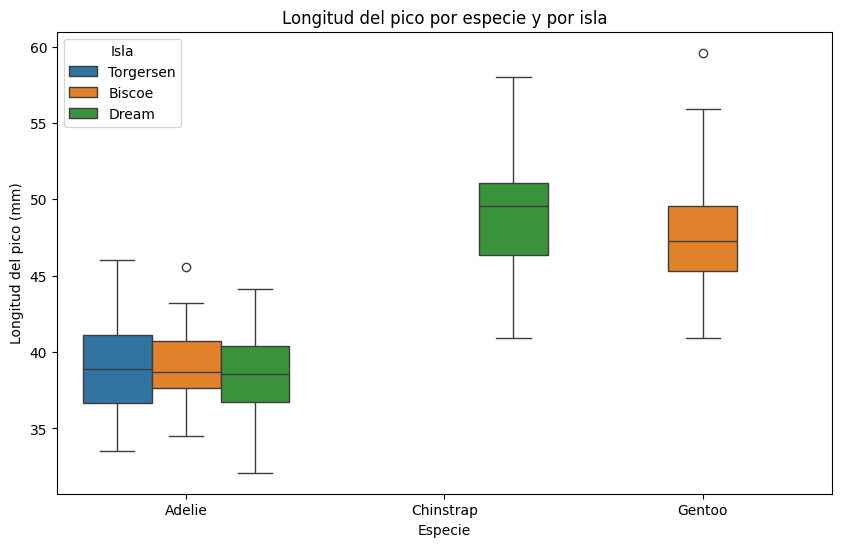

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='bill_length_mm', hue='island')
plt.title("Longitud del pico por especie y por isla")
plt.ylabel("Longitud del pico (mm)")
plt.xlabel("Especie")
plt.legend(title="Isla")
plt.show()

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

Primero visualizamos media y desviacion estandar de los datos para ir haciendo predicciones. Luego se procede a hallar los rangos de los dato al respecto de los límites en que están registradas las longitudes del pico.

In [26]:
medpicos = df.groupby('species')['bill_length_mm'].agg(['mean', 'std']).round(2)
print(medpicos)


            mean   std
species               
Adelie     38.79  2.66
Chinstrap  48.83  3.34
Gentoo     47.50  3.08


In [27]:
rangospico = df.groupby('species')['bill_length_mm'].agg(lambda x: x.max() - x.min()).round(2)
print("Rango (máx - mín) de la longitud del pico por especie:")
print(rangospico)

especie_max_rango = rangospico.idxmax()
valor_max_rango = rangospico.max()

print(f"\nLa especie con mayor rango en la longitud del pico es {especie_max_rango} "
      f"con un rango de {valor_max_rango:.2f} mm.")

Rango (máx - mín) de la longitud del pico por especie:
species
Adelie       13.9
Chinstrap    17.1
Gentoo       18.7
Name: bill_length_mm, dtype: float64

La especie con mayor rango en la longitud del pico es Gentoo con un rango de 18.70 mm.


14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.

La relación más usada es la de Pearson, que cuantifica cómo se relacionan los datos de diferente naturaleza, esta variable va de cero a uno, además se saca la matriz de correlación para un análisis más detallado. Luego se hace un gráfico de dispersión

In [28]:
rp=df['bill_length_mm'].corr(df['body_mass_g'])
print(rp)

0.5951098244376303


In [29]:
df[['bill_length_mm', 'body_mass_g']].corr()

,bill_length_mm,body_mass_g
bill_length_mm,1.00000,0.59511
body_mass_g,0.59511,1.00000


Esto refleja se acerca más fácilmente a una relación de proporción directa, es decir, una relación lineal positiva.

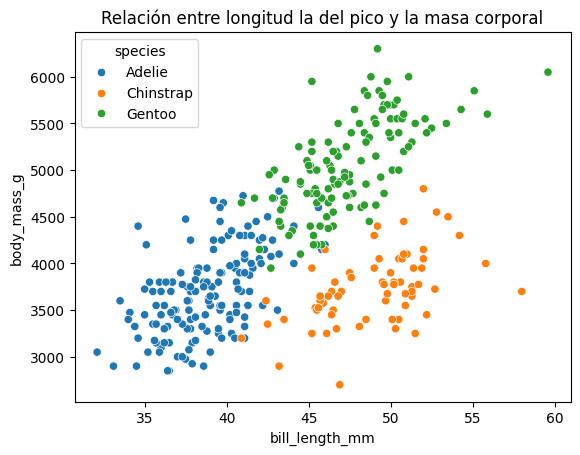

In [30]:
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')
plt.title("Relación entre longitud la del pico y la masa corporal")
plt.show()

Ahora por especie:

In [37]:
df_limpio = df[['species', 'bill_length_mm', 'body_mass_g']].dropna()

# Agrupar por especie y calcular la correlación entre las dos variables
correlaciones = df_limpio.groupby('species').apply(
    lambda grupo: grupo['bill_length_mm'].corr(grupo['body_mass_g'])
)

print("Coeficientes de correlación por especie:")
print(correlaciones)

Coeficientes de correlación por especie:
species
Adelie       0.548866
Chinstrap    0.513638
Gentoo       0.669166
dtype: float64


/tmp/ipython-input-1119341565.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlaciones = df_limpio.groupby('species').apply(


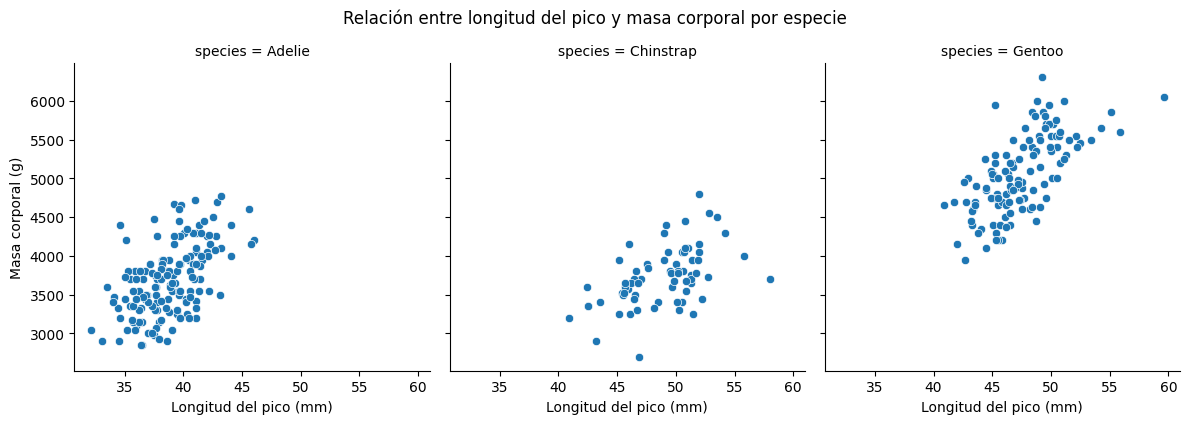

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usar FacetGrid para separar por especie
g = sns.FacetGrid(df_limpio, col="species", height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x="bill_length_mm", y="body_mass_g")
g.set_axis_labels("Longitud del pico (mm)", "Masa corporal (g)")
g.fig.suptitle("Relación entre longitud del pico y masa corporal por especie", y=1.05)
plt.show()

La relación entre la longitud del pico y la masa corporal en los pingüinos varía por especie, aunque en todos los casos es positiva. La especie Gentoo presenta la correlación más fuerte (r = 0.669), lo que indica una relación más consistente entre un pico más largo y una mayor masa corporal. Además, las especies Adelie (r = 0.549) y Chinstrap (r = 0.514) muestran una correlación moderada, lo que sugiere una relación positiva pero menos marcada. En resumen, aunque la dirección de la relación se mantiene en todas las especies, su intensidad cambia, siendo más fuerte en los Gentoo.

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

Como se mencionó hace un momento, al analizar la correlación de Pearson entre la longitud del pico y la masa corporal, se observa un valor de 0.59, lo que sugiere una relación positiva moderada, acercándose a una buena relación. Esto dice que los pingüinos con picos más largos tienden a ser más pesados, aunque esta relación no es estrictamente lineal ni determinística.

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

Para ir adentrándonos en el comportamiento de los datos. Hallamos la media y la desviación estándar incluyendo el sexo y la especie, para luego ver su efecto en la longitud de la aleta.

In [31]:
grasex = df.groupby(['species', 'sex'])['flipper_length_mm'].agg(['mean', 'std', 'count']).round(2)
print(grasex)

                    mean   std  count
species   sex                        
Adelie    Female  187.79  5.60     73
          Male    192.41  6.60     73
Chinstrap Female  191.74  5.75     34
          Male    199.91  5.98     34
Gentoo    Female  212.71  3.90     58
          Male    221.54  5.67     61


In [39]:
df_limpio = df[['species', 'sex', 'flipper_length_mm']].dropna()

def diferencia_de_medias(grupo):
    machos = grupo[grupo['sex'] == 'Male']['flipper_length_mm']
    hembras = grupo[grupo['sex'] == 'Female']['flipper_length_mm']

    if len(machos) > 0 and len(hembras) > 0:
        diferencia = machos.mean() - hembras.mean()
        return pd.Series({
            'media_machos': machos.mean(),
            'media_hembras': hembras.mean(),
            'diferencia_media': diferencia
        })
    else:
        return pd.Series({
            'media_machos': None,
            'media_hembras': None,
            'diferencia_media': None
        })

diferencias_por_especie = df_limpio.groupby('species').apply(diferencia_de_medias)

print("Diferencias de medias de longitud de aleta por especie:")
print(diferencias_por_especie)

Diferencias de medias de longitud de aleta por especie:
           media_machos  media_hembras  diferencia_media
species                                                 
Adelie       192.410959     187.794521          4.616438
Chinstrap    199.911765     191.735294          8.176471
Gentoo       221.540984     212.706897          8.834087


/tmp/ipython-input-173851133.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diferencias_por_especie = df_limpio.groupby('species').apply(diferencia_de_medias)


In [40]:
df_limpio['sexo_codificado'] = df_limpio['sex'].map({'Male': 1, 'Female': 0})
correlaciones = df_limpio.groupby('species').apply(
    lambda grupo: grupo['sexo_codificado'].corr(grupo['flipper_length_mm'])
).reset_index(name='correlacion_pearson')

print(correlaciones)

     species  correlacion_pearson
0     Adelie             0.355141
1  Chinstrap             0.577495
2     Gentoo             0.673352


/tmp/ipython-input-294611616.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlaciones = df_limpio.groupby('species').apply(


Los machos suelen tener la aleta más larga que las hembras en todas las especies. Las pruebas estadísticas muestran que esta diferencia es significativa (p < 0.05) en la mayoría de los casos, indicando que no es por azar, sino una diferencia real entre sexos en la longitud de la aleta.

Si tomamos machos como 1 y hembas como 0, para hacer una evaluacion cuantitavi se tiene que la correlación entre el sexo y la longitud de la aleta en pingüinos es positiva en todas las especies, indicando que los machos tienden a tener aletas más largas que las hembras. Esta relación es más fuerte en Gentoo (r ≈ 0.67), seguida por Chinstrap (r ≈ 0.58) y es más débil en Adelie (r ≈ 0.36), lo que sugiere que el dimorfismo sexual en la longitud de aleta varía según la especie.

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

Caso 1: Correlación entre la longitud del pico y la masa corporal (Pearson)

Hipótesis nula (H0):
No existe correlación entre la longitud del pico y la masa corporal en los pingüinos.
(H0: la correlación poblacional es igual a 0)

Hipótesis alternativa (H1):
Existe correlación entre la longitud del pico y la masa corporal en los pingüinos.
(H1: la correlación poblacional es distinta de 0)

In [34]:

df_clean = df[['bill_length_mm', 'body_mass_g']].dropna()

x = df_clean['bill_length_mm']
y = df_clean['body_mass_g']

r, p_value = pearsonr(x, y)

print(f"Coeficiente de correlación de Pearson: {r:.3f}")
print(f"P-valor asociado: {p_value:.4f}")

if p_value < 0.05:
    print("Rechazamos H0: La correlación es estadísticamente significativa.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar correlación.")

Coeficiente de correlación de Pearson: 0.595
P-valor asociado: 0.0000
Rechazamos H0: La correlación es estadísticamente significativa.


Caso 2: Diferencia de longitud de aleta entre machos y hembras (test t por especie)

Hipótesis nula (H0):
No hay diferencia en la longitud promedio de la aleta entre machos y hembras de la especie.
(H0: la media de los machos es igual a la media de las hembras)

Hipótesis alternativa (H1):
Sí hay una diferencia en la longitud promedio de la aleta entre machos y hembras de la especie.
(H1: la media de los machos es distinta a la media de las hembras)

In [35]:
especie = 'Gentoo'
grupo = df[df['species'] == especie]

machos = grupo[grupo['sex'] == 'Male']['flipper_length_mm'].dropna()
hembras = grupo[grupo['sex'] == 'Female']['flipper_length_mm'].dropna()

t_stat, p_val = ttest_ind(machos, hembras, equal_var=False)

print(f"Prueba t para longitud de aleta en {especie}:")
print(f"t = {t_stat:.3f}, p-valor = {p_val:.4f}")

if p_val < 0.05:
    print("Rechazamos H0: Hay diferencia significativa entre machos y hembras.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para afirmar diferencia.")

Prueba t para longitud de aleta en Gentoo:
t = 9.942, p-valor = 0.0000
Rechazamos H0: Hay diferencia significativa entre machos y hembras.


Los análisis realizados muestran que existe una correlación positiva y estadísticamente significativa entre la longitud del pico y la masa corporal de los pingüinos (r = 0.595, p < 0.0001), lo que indica que a mayor longitud del pico, mayor tiende a ser el peso, y esta relación no se debe al azar. Además, al comparar la longitud de las aletas entre machos y hembras de la especie Gentoo mediante una prueba t, se encontró una diferencia significativa (t = 9.942, p < 0.0001), lo que indica que los machos y las hembras presentan diferencias reales en esta característica física. En conjunto, estos resultados evidencian relaciones morfológicas y diferencias sexuales marcadas dentro de la población analizada.